<a href="https://colab.research.google.com/github/IagoMagalhaes23/BBP1026---PROCESSAMENTO-DIGITAL-DE-IMAGENS/blob/main/Trabalho_2_Iago_Magalhaes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabalho 2
- Autor: Iago Magalhães
- Matrícula: 559973
- Disciplina: Processamento Digital de Imagens

##Importação das bibliotecas

In [ ]:
import cv2
import pylab
import numpy as np
import skimage.data as data
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from google.colab.patches import cv2_imshow

##Carregamento da imagem

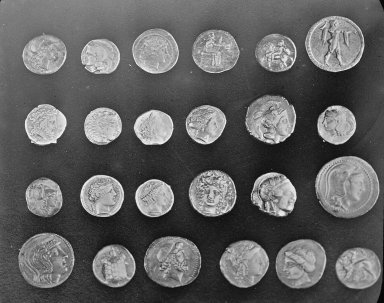

In [ ]:

image = cv2.imread('download.png')
cv2_imshow(image)

##Ajuste de contraste

In [ ]:
def contrast(image, alpha, beta):
  '''
    Função para ajuste de contraste
    :param image: recebe um image array
    :param alpha: recebe um valor float entre 1.0 e 3.0
    :param beta: recebe um valor inteiro entre 0 e 100
    :return: retorna uma image array com aplicação do ajuste de contraste
  '''
  new_image = np.zeros(image.shape, image.dtype)

  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
      for c in range(image.shape[2]):
        new_image[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0, 255)

  return new_image

##Filtragem de ruído

In [ ]:
def filter(image, filtro, kernel):
  '''
    Função para aplicação de filtro de ruído
    :param image: recebe um image array
    :param filtro: seleciona um filtro para filtragem de ruído. Sendo 'gaussiano' ou 'mediana'
    :param kernel: seleciona o tamanho do kernel a ser aplicado no filtro. Recebe um valor inteiro
  '''
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  if(filtro == 'gaussian'):
    image = cv2.GaussianBlur(image, (kernel, kernel), 0)
    return image
  elif(filtro == 'mediana'):
    image = cv2.medianBlur(image, kernel)
    return image
  else:
    print('Erro ao selecionar o filtro')

##Limiarização

In [ ]:
def thresholdingGlobal(image, threshold):
  '''
    Função para aplicação da limiarização global
    :param image: recebe um image array
    :param threshold: recebe um valor inteiro para aplicação da limiarização global
    :return: retorna uma imagem com a aplicação da limiarização global
  '''
  limiaImage = np.where(image > threshold, 255, 0)

In [ ]:
def thresholdingLocal(image, window_size):
  '''
    Função para aplicação da limiarização local
    :param image: recebe um image array
    :param window_size: recebe um valor inteiro para aplicação da limiarização local em uma janela
    :return: retorna uma imagem com a aplicação da limiarização local
  '''
  w, h = image.shape

  for i in range(w):
    for j in range(h):
      # Define the local window
      left = max(0, i - window_size // 2)
      upper = max(0, j - window_size // 2)
      right = min(w, i + window_size // 2)
      lower = min(h, j + window_size // 2)

      # Calculate the mean intensity in the local window
      local_mean = sum(image[p, q] for p in range(left, right) for q in range(upper, lower)) // ((right - left) * (lower - upper))

      # Apply threshold
      if image[i, j] > local_mean:
        image[i, j] = 255
      else:
        image[i, j] = 0

  return image

##Detecção de bordas

In [ ]:
def robertEdge(image):
  '''
    Função para detecção de bordas com o detector de bordas de Roberts
    :param image: recebe um image array
    :return: retorna uma imagem com a aplicação do detector de bordas de Roberts
  '''
  image = np.array(image)

  if len(image.shape) > 2:
    image = np.mean(image, axis=2)

  x = np.array([[1,0],[0,-1]])
  y = np.array([[0,1],[-1,0]])

  # image = image[:,:,:]

  gradient_x = convolve2d(image, x, mode='same')
  gradient_y = convolve2d(image, y, mode='same')

  result = np.sqrt(gradient_x**2 + gradient_y**2)
  result *= 255.0 / np.max(result)

  return result

In [ ]:
def prewittEdge(image):
  '''
    Função para detecção de bordas com o detector de bordas de Prewitt
    :param image: recebe um image array
    :return: retorna uma imagem com a aplicação do detector de bordas de Prewitt
  '''
  image = np.array(image)

  if len(image.shape) > 2:
    image = np.mean(image, axis=2)

  x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
  y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])


  # image = image[:,:,:]

  gradient_x = convolve2d(image, x, mode='same')
  gradient_y = convolve2d(image, y, mode='same')

  result = np.sqrt(gradient_x**2 + gradient_y**2)
  result *= 255.0 / np.max(result)

  return result

##Análise de resultados

###C1a

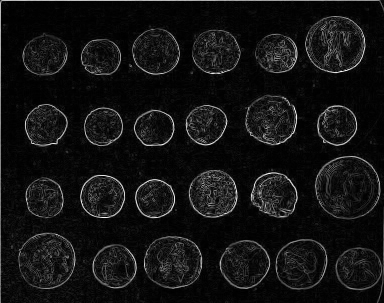

In [ ]:
alpha = 1.0
beta = 30
filtro = 'gaussian'
kernel = 3

imageContrast = contrast(image, alpha, beta)
imageFilter = filter(imageContrast, filtro, kernel)
meanGlobal = np.mean(imageFilter)
limiaImage = thresholdingGlobal(imageFilter, meanGlobal)
result = robertEdge(image)

cv2_imshow(result)

###C1b

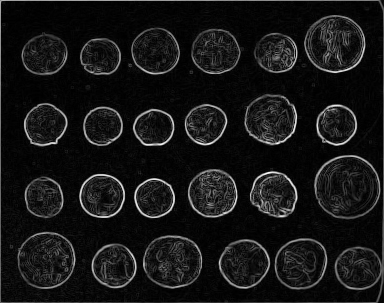

In [ ]:
alpha = 1.0
beta = 30
filtro = 'mediana'
kernel = 3

imageContrast = contrast(image, alpha, beta)
imageFilter = filter(imageContrast, filtro, kernel)
meanGlobal = np.mean(imageFilter)
limiaImage = thresholdingGlobal(imageFilter, meanGlobal)
result = prewittEdge(image)

cv2_imshow(result)

###C2a

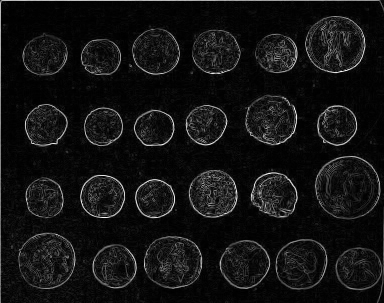

In [ ]:
alpha = 1.0
beta = 30
filtro = 'gaussian'
kernel = 3
window_size = 15

imageContrast = contrast(image, alpha, beta)
imageFilter = filter(imageContrast, filtro, kernel)
limiaImage = thresholdingLocal(imageFilter, window_size)
result = robertEdge(image)

cv2_imshow(result)

###C2b

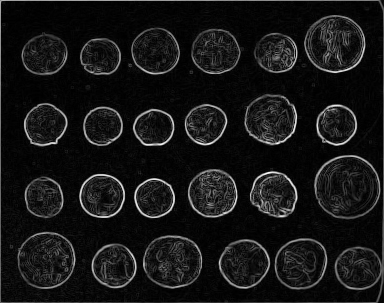

In [ ]:
alpha = 1.0
beta = 30
filtro = 'mediana'
kernel = 3
window_size = 15

imageContrast = contrast(image, alpha, beta)
imageFilter = filter(imageContrast, filtro, kernel)
limiaImage = thresholdingLocal(imageFilter, window_size)
result = prewittEdge(image)

cv2_imshow(result)

##Referências
- http://www.lps.usp.br/hae/apostila/limiar.pdf
- https://docs.opencv.org/4.x/d3/dc1/tutorial_basic_linear_transform.html
- https://www.inf.ufsc.br/~aldo.vw/visao/1998/seara/index.html#5.1
- https://www.youtube.com/watch?v=sKz9KFpc0rQ